# **Introduction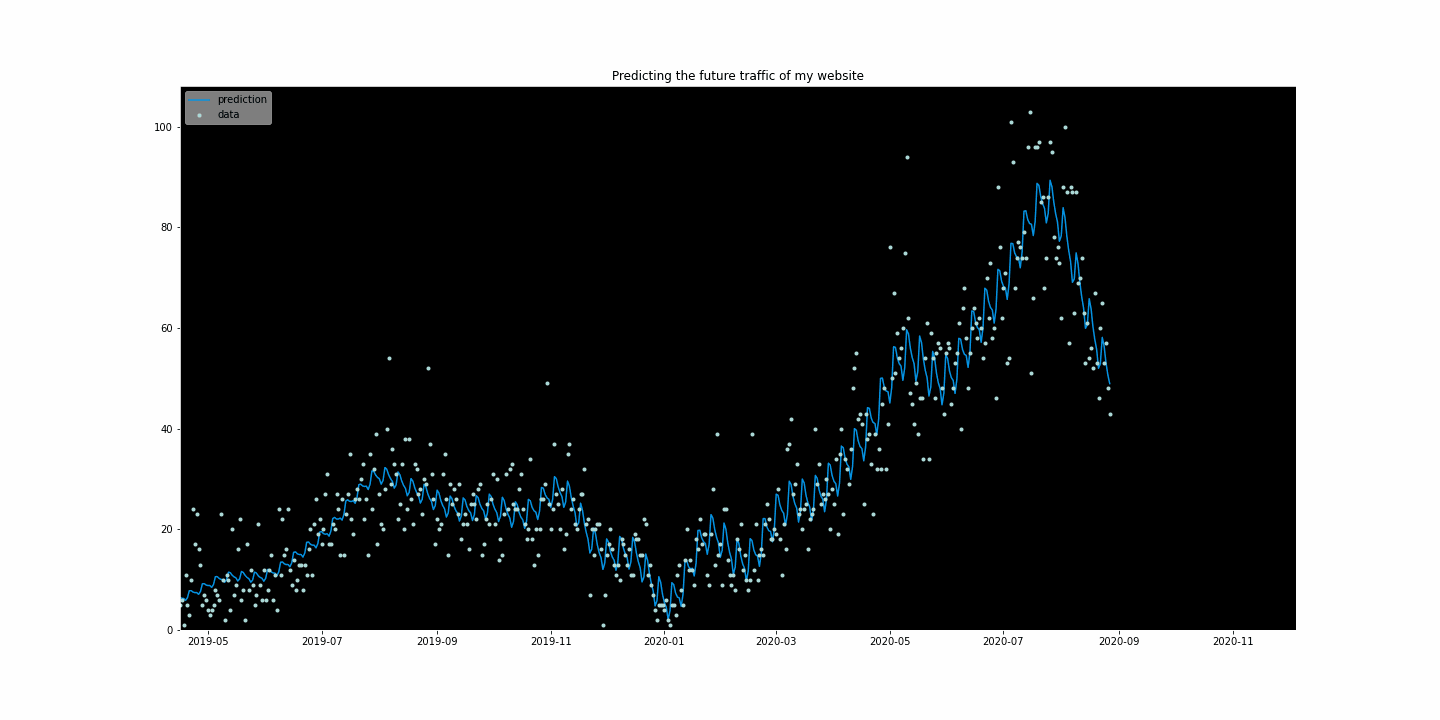**
Time-series is series of obeservations that are recorded over a period of time. these observations are dependent of time component which can not be neglected thus we have have to analysis the this data keeping time component in mind.

Time series forecasting is parhaps one of the most common type of machine learning techniques used in real-world scenarios. `time-sereis forecsting refers to predicting future values from historical data by statical analysis of trends and patterns from certain time-series data.` it falls under unsupervised learning category but called as a self-supervised learning or supervised learning technique. time-series data can be much complex to find patterns out of it, this is because irregular component of time series.

**Use-cases and applications:**

Forecast product demand

Economic growth and population forecasting

Weather forecasting

Stock price forecasting

Sales/Revenue forecasting

Web-traffic forecasting

Stock market prediction has been a significant area of research in Machine Learning. Machine learning algorithms such as regression, classifier, and support vector machine (SVM) help predict the stock market. This article presents a simple implementation of analyzing and forecasting Stock market prediction using machine learning. The case study focuses on a popular online retail store, and Random Forest is a powerful tree-based technique for predicting stock prices.

# **Program Implementation**

We will now go to the section where we will utilize Machine Learning techniques in Python to estimate the stock value using the LSTM.

# Step 1: Importing the **Libraries**

As we all know, the first step is to import the libraries required to preprocess Microsoft Corporation stock data and the other libraries required for constructing and visualizing the LSTM model outputs. We’ll be using the Keras library from the TensorFlow framework for this. All modules are imported from the Keras library.

In [49]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model # Updated import for plot_model

# Ensuring plots are displayed inline
%matplotlib inline

# Your code continues here...

# Step 2: Getting to Visualising the Stock Market Prediction **Data**

Using the Pandas Data Reader library, we will upload the stock data from the local system as a Comma Separated Value (.csv) file and save it to a pandas DataFrame. Finally, we will examine the data.

In [ ]:
#Get the Dataset
df=pd.read_csv("microsoftstock")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


# Step 3: Checking for Null Values by Printing the DataFrame **Shape**

In this step, firstly, we will print the structure of the dataset. We’ll then check for null values in the data frame to ensure that there are none. The existence of null values in the dataset causes issues during training since they function as outliers, creating a wide variance in the training process.

In [ ]:
#Print the shape of Dataframe and Check for Null Values
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1925, 7)
Null Value Present:  False


# Step 4: Plotting the True Adjusted Close **Value**

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

<Axes: >

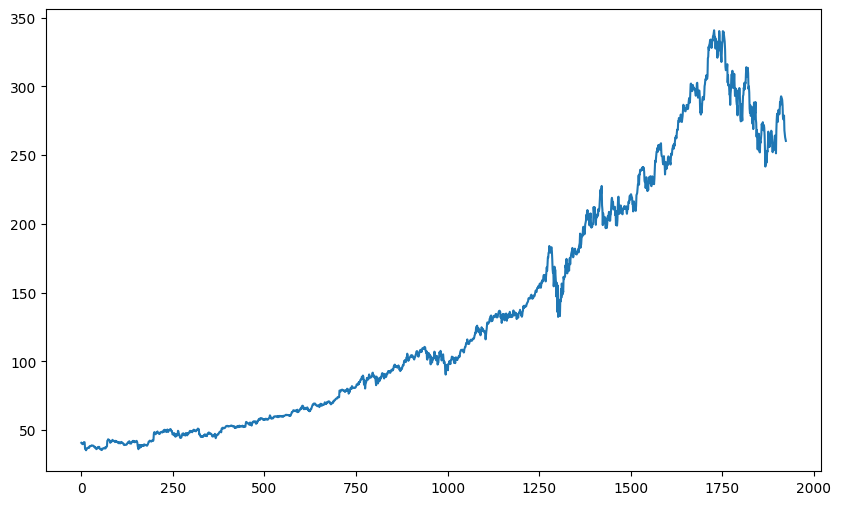

In [ ]:
#Plot the True Adj Close Value
df['Adj Close'].plot()


# Step 5: Setting the Target Variable and Selecting the **Features**

The output column is then assigned to the target variable in the following step. It is the adjusted relative value of Microsoft Stock in this situation. Furthermore, we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:

Open

High

Low

Volume

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


['Open', 'High', 'Low', 'Volume']


# Step 6: **Scaling**

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased. Also, because the data is not spread out in huge values, we can achieve greater precision by scaling down. To perform this, we will be using the MinMaxScaler class of the sci-kit-learn library.

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.023268,0.022011,0.021952,0.100324
1,0.021789,0.023209,0.020960,0.172161
2,0.018470,0.017803,0.019505,0.137840
3,0.019324,0.018257,0.018811,0.156581
4,0.016334,0.017933,0.018018,0.174787


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Volume'].plot(kind='hist', bins=20, title='Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

As shown in the above table, the values of the feature variables are scaled down to lower values when compared to the real values given above.

# Step 7: Creating a Training Set and a Test Set for Stock Market **Prediction**

Before inputting the entire dataset into the training model, we need to partition it into training and test sets. The Machine Learning LSTM model will undergo training using the data in the training set, and its accuracy and backpropagation will be tested against the test set.

To accomplish this, we will employ the TimeSeriesSplit class from the sci-kit-learn library. We will configure the number of splits to be 10, indicating that 10% of the data will serve as the test set, while the remaining 90% will train the LSTM model. The advantage of employing this Time Series split lies in its examination of data samples at regular time intervals.

In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

# Step 8: Data Processing For **LSTM**

Once the training and test sets are finalized, we will input the data into the LSTM model. Before we can do that, we must transform the training and test set data into a format that the LSTM model can interpret. As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). Now, 6667 are the number of samples in the training set, which is 90% of 7334, and the number of features is 4. Therefore, the training set is reshaped to reflect this (6667, 1, 4). Likewise, the test set is reshaped.

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

# Step 9: Building the LSTM Model for Stock Market **Prediction**

Finally, we arrive at the point when we construct the LSTM Model. In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. The model is plotted and presented below.

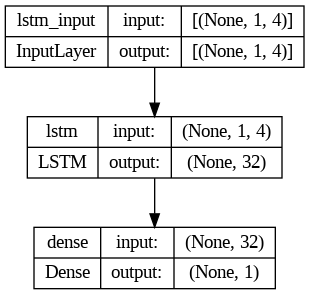

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Step 10: Training the Stock Market Prediction **Model**

Finally, we use the fit function to train the LSTM model created above on the training data for 100 epochs with a batch size of 8.

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
219/219 [==============================] - 4s 7ms/step - loss: 20362.2441
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 19676.1914
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 18597.1191
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 17127.1914
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 15380.6719
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 13487.8564
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 11565.8145
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 9710.1396
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 7993.3887
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 6465.5532
Epoch 11/100
219/219 [==============================] - 1s 4ms/step - loss: 5155.3335
Epoch 12/100
219/219 [==============================] - 

Finally, we can observe that the loss value has dropped exponentially over time over the 100-epoch training procedure, reaching a value of 0. 2.0694.

# Step 11: Making the LSTM **Prediction**

Now that we have our model ready, we can use it to forecast the Adjacent Close Value of the Microsoft stock by using a model trained using the LSTM network on the test set. We can accomplish this by employing simple prediction model on the LSTM model

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

6/6 [==============================] - 1s 11ms/step


# Step 12: Comparing Predicted vs True Adjusted Close Value – **LSTM**

Finally, now that we’ve projected the values for the test set, we can display the graph to compare both Adj Close’s true values and Adj Close’s predicted value using the LSTM Machine Learning model.

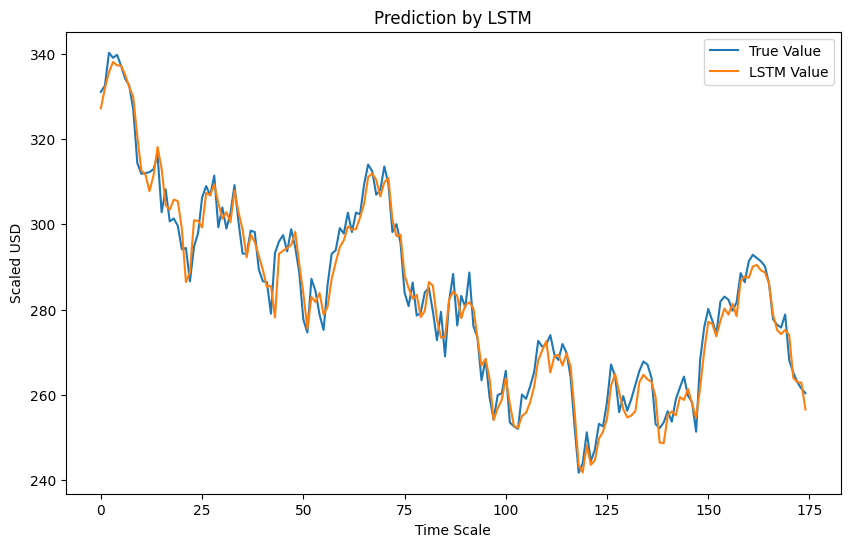

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns. We may get a more accurate depiction of every specific company’s stock value by fine-tuning many parameters and adding more LSTM layers to the model.

# **Conclusion**
However, with the introduction of Machine Learning and its strong algorithms, the most recent market research and Stock Market Prediction using machine learning advancements have begun to include such approaches in analyzing stock market data. The Opening Value of the stock, the Highest and Lowest values of that stock on the same day, as well as the Closing Value at the end of the day are all indicated for each date. Furthermore, the total volume of the stocks in the market is provided; with this information, it is up to the job of a Machine Learning Data Scientist to look at the data and develop different algorithms that may help in finding appropriate stocks values.

Predicting the stock market was a time-consuming and laborious procedure a few years or even a decade ago. However, with the application of machine learning for stock market forecasts, the procedure has become much simpler. Machine learning not only saves time and resources but also outperforms people in terms of performance. it will always prefer to use a trained computer algorithm since it will advise you based only on facts, numbers, and data and will not factor in emotions or prejudice. It would be interesting to incorporate sentiment analysis on news & social media regarding the stock market in general, as well as a given stock of interest.

